<a href="https://colab.research.google.com/github/HussainRaza17/RF-IDS-DDoS-Random-Forest-based-Intrusion-Detection-System-for-DDoS-Attacks/blob/main/RF_IDS_DDos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data upload

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv to Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv


In [ ]:
filename = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df = pd.read_csv(filename)

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nDataset Columns:\n", df.columns.tolist())
print("\nFirst 5 rows of data:\n", df.head())
print("\nMissing values per column:\n", df.isnull().sum())

Shape of the dataset: (225745, 79)

Dataset Columns:
 [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Cou

In [ ]:
df = df.dropna()

In [ ]:
df.columns = df.columns.str.strip()

print("Columns after stripping spaces:", df.columns.tolist())

if 'Label' in df.columns:
    label_encoder = LabelEncoder()
    df['Label'] = label_encoder.fit_transform(df['Label'])
else:
    print(" 'Label' column not found!")

Columns after stripping spaces: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', '

In [ ]:
cols_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [ ]:
X = df.drop('Label', axis=1)
y = df['Label']

In [ ]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Total NaN values before filling:", X.isna().sum().sum())

X.fillna(X.mean(), inplace=True)

print("Any NaNs remaining?", X.isna().sum().sum())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Total NaN values before filling: 60
Any NaNs remaining? 0


### I have made changes here;

**Old One**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

**New One**
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Here also

**Old one**
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

**New one**

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9997785111519635

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19543
           1       1.00      1.00      1.00     25606

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149



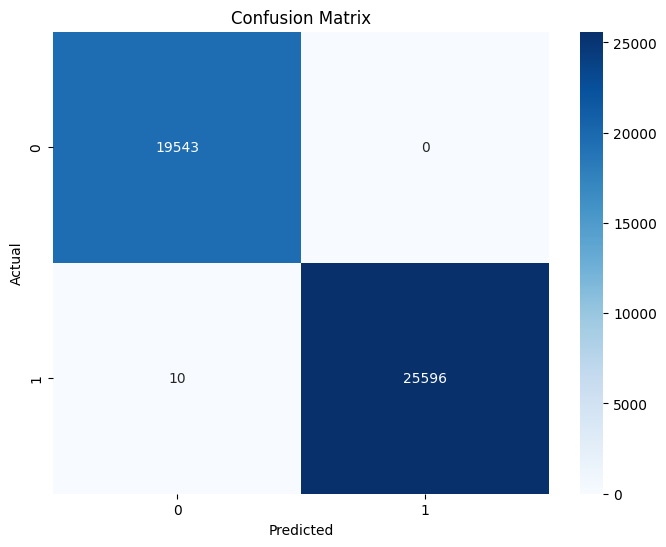

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19543
           1       1.00      1.00      1.00     25606

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

[[19543     0]
 [   10 25596]]


---
### further Improvement

In [ ]:
feature_importance = rf_model.feature_importances_

In [ ]:
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

In [ ]:
features_df = features_df.sort_values(by='Importance', ascending=False)

In [ ]:
print(features_df.head(20))

                        Feature  Importance
6         Fwd Packet Length Max    0.080560
66       Init_Win_bytes_forward    0.079929
53         Avg Fwd Segment Size    0.067405
8        Fwd Packet Length Mean    0.060810
63            Subflow Fwd Bytes    0.055779
62          Subflow Fwd Packets    0.055117
0              Destination Port    0.050259
11        Bwd Packet Length Min    0.049666
4   Total Length of Fwd Packets    0.041491
68             act_data_pkt_fwd    0.038029
22                  Fwd IAT Std    0.033025
23                  Fwd IAT Max    0.032521
21                 Fwd IAT Mean    0.030646
20                Fwd IAT Total    0.027669
34            Fwd Header Length    0.023781
9         Fwd Packet Length Std    0.023360
67      Init_Win_bytes_backward    0.020854
55          Fwd Header Length.1    0.018557
10        Bwd Packet Length Max    0.017466
35            Bwd Header Length    0.016297


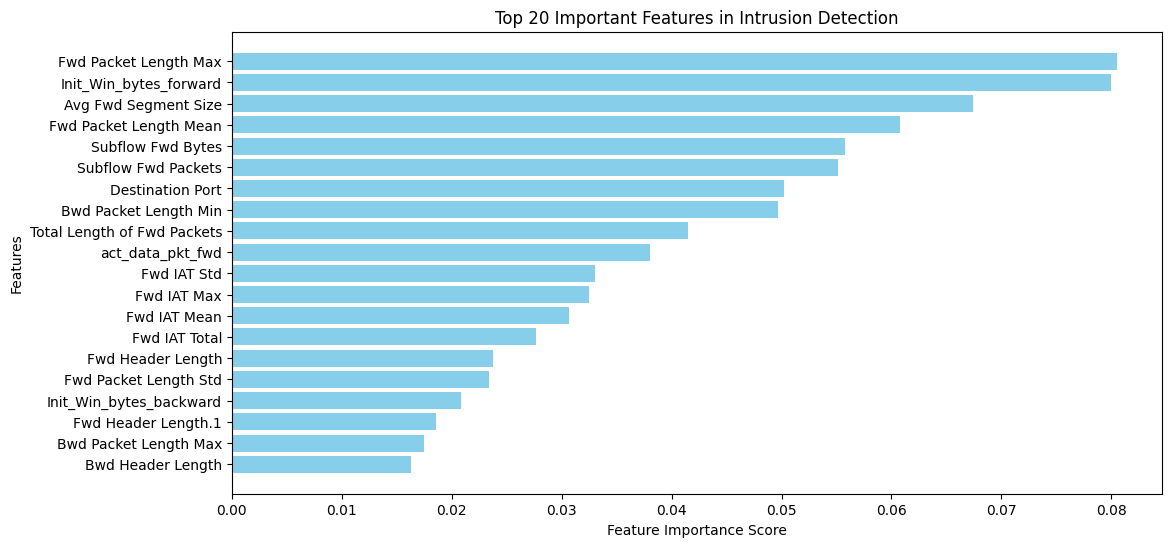

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'][:20], features_df['Importance'][:20], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Important Features in Intrusion Detection")
plt.gca().invert_yaxis()  # Flip chart for better readability
plt.show()

---
### Futher Optimize

In [ ]:
top_features = features_df['Feature'][:20].tolist()
X_train_selected = X_train[:, [X.columns.get_loc(c) for c in top_features]] # Use numerical indices for NumPy array
X_test_selected = X_test[:, [X.columns.get_loc(c) for c in top_features]]  # Use numerical indices for NumPy array

---
### train random forest again

In [ ]:
rf_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

---
### evaluate

In [ ]:
y_pred_selected = rf_model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy after Feature Selection:", accuracy_selected)

Accuracy after Feature Selection: 0.9999335533455891


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model_selected, X_train_selected, y_train, cv=5)
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.9999058650319373


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
cv_scores = cross_val_score(rf_model_selected, X_train_selected, y_train, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.9999058650319373


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Class Distribution:", dict(zip(unique, counts)))

Class Distribution: {np.int64(0): np.int64(78171), np.int64(1): np.int64(102421)}


---
### balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

---
### Misclassified Samples

In [ ]:
y_pred = rf_model_selected.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19541     2]
 [    1 25605]]


-----------------------------
### Matrix code

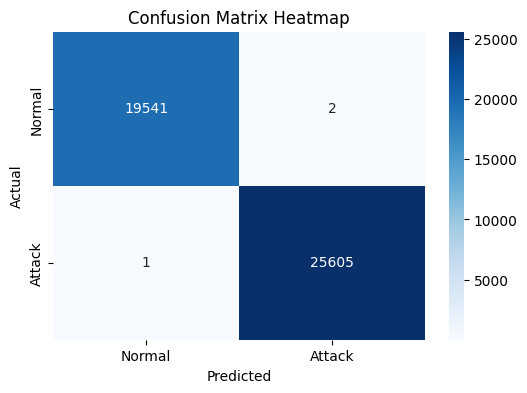

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.99%
